In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import random as rand
plt.rcParams['axes.facecolor'] = 'black'

In [2]:
def perlin(x):
    return np.cos(x)

In [3]:
persistence = np.e
lacunarity = 2.5

In [4]:
x = np.linspace(-5,5,10000)

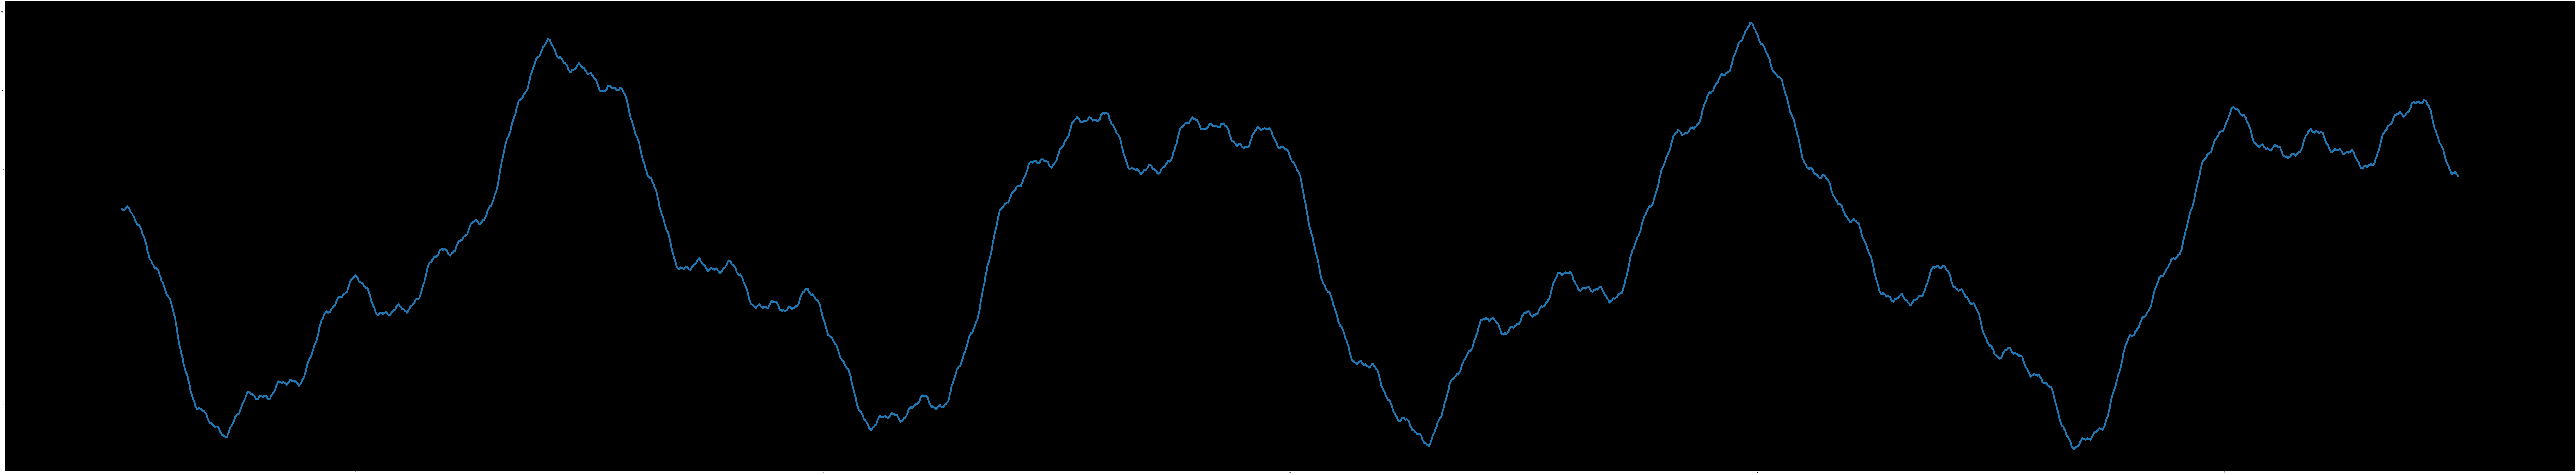

In [5]:
y = np.linspace(0,0,10000)
for i in range(1,11):
    y += 10*perlin((lacunarity**i)*x + rand.random()*rand.random()*10.24)/(persistence**i)+0.6
plt.figure(figsize=(256,48))
plt.plot(x,y,linewidth=10)

In [6]:
class droplet:
    def __init__(self):
        xpos = rand.randint(50,9999-50)
        self.pos = [xpos, y[xpos]]
        self.gradients = [[1, y[xpos+1]-y[xpos]],[-1,y[xpos-1]-y[xpos]]]
        self.angles = [np.arctan(self.gradients[0][1]/self.gradients[0][0]),np.arctan(self.gradients[1][1]/self.gradients[1][0])]
        self.load = 0
        self.speed = rand.randint(-30,30)
        self.mass = 0.005
        self.volume = 0.005
        self.mu_k = 0.160
        self.max_speed = 30
        self.e_const = 1
        self.capacity = 0
        self.p_erosion = 0.5
        self.p_deposition = 0.5

In [7]:
iterations = 8
droplets = 100

In [ ]:
from IPython.core.debugger import set_trace
output = y
friction_dir=0
e_custom = 0.5
h_diff = 0
it_num = 0

for h in range(0,droplets+1):
    d=droplet()
    vel=d.speed
    for i in range(0,iterations+1):
        previous_positions = [None]*10
        empty = 0
        steps = abs(vel)
        total_steps = steps
        if vel == 0:
            vel = min(d.gradients[0][1],d.gradients[1][1])/abs(min(d.gradients[0][1],d.gradients[1][1]))
            steps = abs(vel)
        while steps > 0:
            if (d.pos[0] in range(50,9999-50)):
                for k in range(1,10):
                    previous_positions[-k] = previous_positions[-(k+1)]
                previous_positions[0] = d.pos[0]
                for l in range(0,10):
                    if previous_positions[l]==None:
                        empty += 1
                if vel > 30:
                    vel = 30
                if vel < -30:
                    vel = -30
                #set_trace()
                if vel > 0:
                    friction_dir=-1
                    d.pos[0] += 1
                    d.pos[1] = y[d.pos[0]]
                    if d.gradients[1][1]>0:
                        vel -= np.rint(5*(9.81*np.sin(d.angles[0])*np.cos(d.angles[0]) + friction_dir*d.mu_k*9.81*(np.cos(d.angles[0])**2))/steps)
                    if d.gradients[1][1]<0:
                        vel += np.rint(5*(9.81*np.sin(d.angles[0])*np.cos(d.angles[0]) + friction_dir*d.mu_k*9.81*(np.cos(d.angles[0])**2))/steps)
                    vel -= 1
                    h_diff = d.gradients[0][1]
                if vel < 0:
                    friction_dir=1
                    d.pos[0] -= 1
                    d.pos[1] = y[d.pos[0]]
                    if d.gradients[1][1]>0:
                        vel += np.rint(5*(9.81*np.sin(d.angles[0])*np.cos(d.angles[0]) + friction_dir*d.mu_k*9.81*(np.cos(d.angles[0])**2))/steps)
                    if d.gradients[1][1]<0:
                        vel -= np.rint(5*(9.81*np.sin(d.angles[0])*np.cos(d.angles[0]) + friction_dir*d.mu_k*9.81*(np.cos(d.angles[0])**2))/steps)
                    vel += 1
                    h_diff = d.gradients[1][1]

                d.gradients = [[1, y[d.pos[0]+1]-y[d.pos[0]]],[-1,y[d.pos[0]-1]-y[d.pos[0]]]]
                d.angles = [np.arctan(d.gradients[0][1]/d.gradients[0][0]),np.arctan(d.gradients[1][1]/d.gradients[1][0])]
                steps = abs(vel)

                d.capacity = d.e_const*d.mass*d.speed
                if d.load <= d.capacity or h_diff < 0:
                    d.load += d.capacity*min((d.capacity-d.load)*d.p_erosion,(-h_diff))
                    if vel > 0:
                        output[d.pos[0]-1] -= e_custom*d.capacity*min((d.capacity-d.load)*d.p_erosion,(-h_diff))
                    elif vel < 0:
                        output[d.pos[0]+1] -= e_custom*d.capacity*min((d.capacity-d.load)*d.p_erosion,(-h_diff))
                elif d.load >= d.capacity or h_diff > 0:
                    d.load -= (d.load-d.capacity)*d.p_deposition
                    if vel > 0:
                        output[d.pos[0]-1] += e_custom*(d.load-d.capacity)*d.p_deposition
                    elif vel < 0:
                        output[d.pos[0]+1] += e_custom*(d.load-d.capacity)*d.p_deposition
                it_num += 1
                if it_num == 50:
                    it_num = 0
                    break
                if (empty==0 and np.std(previous_positions)<5):
                    break
                #set_trace()
                    
plt.figure(figsize=(256,48))
plt.plot(x, output, linewidth=10)

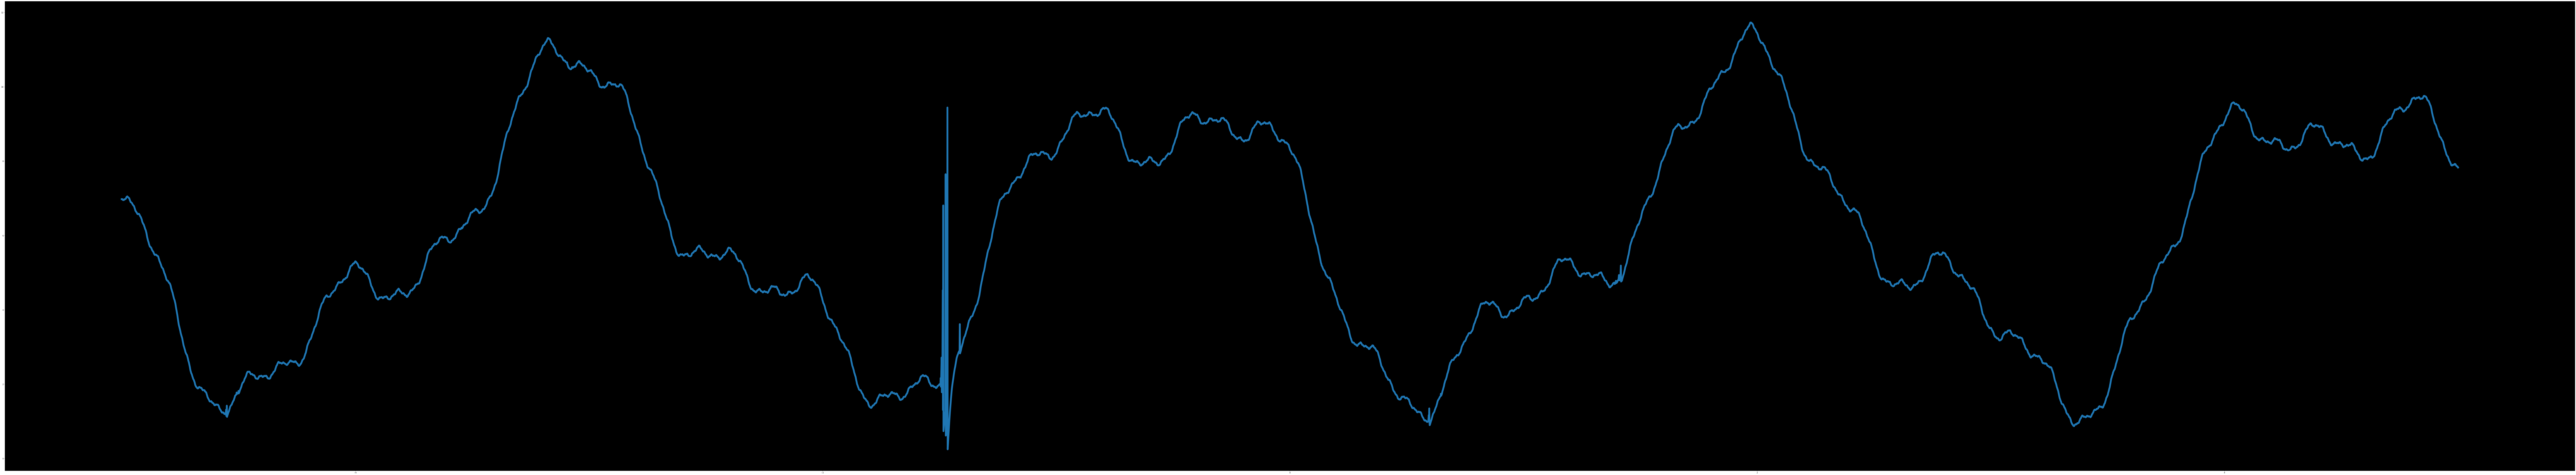

In [9]:
plt.figure(figsize=(256,48))
plt.plot(x, y, linewidth=10)

from IPython.core.debugger import set_trace
y_eroded = y
kinetic_energy = d.mass*(d.speed**2)/2
friction_dir = 0
e_custom = 1
h_diff = 0



for h in range(0, droplets+1):
    d = droplet()
    vel = abs(d.speed)
    for i in range(0,iterations + 1):
        steps = vel
        while steps > 0:
            #set_trace()
            if (d.pos in range(50, 9999-50)):
                if d.speed > 0:
                    d.pos = [d.pos[0] + 1, y[d.pos[0]]]
                    friction_dir = -1
                    #steps += (d.speed - np.rint(np.sqrt(abs((kinetic_energy + 9.81*np.sin(d.angles[0])*np.cos(d.angles[0]) + friction_dir*d.f_k*9.81*(np.cos(d.angles[0])**2))*2/d.mass))))
                    h_diff = d.gradients[0][1]
                    d.gradients = [[1, y[d.pos[0]+1]-y[d.pos[0]]],[-1,y[d.pos[0]-1]-y[d.pos[0]]]]
                elif d.speed < 0:
                    d.pos = [d.pos[0] - 1, y[d.pos[0]]]
                    friction_dir = 1
                    #steps += (d.speed - np.rint(np.sqrt(abs((kinetic_energy - 9.81*np.sin(d.angles[1])*np.cos(d.angles[1]) + friction_dir*d.f_k*9.81*(np.cos(d.angles[1])**2))*2/d.mass))))
                    h_diff = d.gradients[1][1]
                    d.gradients = [[1, y[d.pos[0]+1]-y[d.pos[0]]],[-1,y[d.pos[0]-1]-y[d.pos[0]]]]
                
                d.capacity = d.e_const*d.mass*d.speed
                #if d.load <= d.capacity or h_diff < 0:
                d.load = d.load + d.capacity*min((d.capacity-d.load)*d.p_erosion,(-h_diff))
                #y_eroded[d.pos[0]] = y_eroded[d.pos[0]] - e_custom*d.capacity*min((d.capacity-d.load)*d.p_erosion,(-h_diff))
                y_eroded[d.pos[0]] -= 10
                #elif d.load >= d.capacity or h_diff > 0:
                    #d.load = d.load - (d.load-d.capacity)*d.p_deposition
                    #y_eroded[d.pos[0]] = y_eroded[d.pos[0]] + e_custom*(d.load-d.capacity)*d.p_deposition
            steps -= 1
#set_trace()
                

plt.figure(figsize=(256,48))
plt.plot(x, y_eroded, linewidth=10)
    